## Install Requirements

In [1]:
!pip install -r requirements.txt --quiet


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, Callback
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization
from sklearn.model_selection import KFold

## Data Cleaning

In [5]:
!csvcut -n dataset/NutriLens5.csv

  1: Energi (kal)
  2: Protein (g)
  3: Lemak (g)
  4: Gula (g)
  5: Serat (g)
  6: Natrium (mg)
  7: Negative Score
  8: Positif
  9: Score
 10: Grade


In [8]:
!csvcut -c 1,2,3,4,5,6,10 dataset/NutriLens5.csv > dataset/NutriLensFinal.csv

In [9]:
data = pd.read_csv('dataset/NutriLensFinal.csv')
data

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Grade
0,165.00,1.50,2.00,65.00,3.0,0.0000,C
1,0.00,2.70,0.90,9.80,0.0,0.1000,B
2,57.00,10.00,0.10,3.90,0.0,0.0900,A
3,375.00,7.80,3.08,70.10,0.0,1.4000,D
4,163.90,15.30,1.00,0.00,0.0,1.1000,A
...,...,...,...,...,...,...,...
104994,299.21,8.66,7.09,19.69,0.8,0.0000,C
104995,257.00,10.62,2.21,28.32,0.9,0.6050,C
104996,238.00,9.90,0.50,25.74,0.0,1.6075,B
104997,40.00,0.81,0.00,10.48,1.6,1.6075,B


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104999 entries, 0 to 104998
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Energi (kal)  104999 non-null  float64
 1   Protein (g)   104999 non-null  float64
 2   Lemak (g)     104999 non-null  float64
 3   Gula (g)      104999 non-null  float64
 4   Serat (g)     104999 non-null  float64
 5   Natrium (mg)  104999 non-null  float64
 6   Grade         104999 non-null  object 
dtypes: float64(6), object(1)
memory usage: 5.6+ MB


In [11]:
data.describe(include='all')

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Grade
count,1.049990e+05,104999.000000,104999.000000,104999.000000,104999.000000,104999.000000,104999
unique,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,NaN,NaN,NaN,NaN,NaN,37370
mean,2.875606e+02,8.376449,4.394928,36.876934,2.146506,7.392016,NaN
std,5.267588e+03,125.953423,10.557929,1389.747055,10.106481,1544.238736,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,8.500000e+01,0.420000,0.000000,6.250000,0.000000,0.020000,NaN
50%,2.630000e+02,4.760000,1.100000,20.799999,0.000000,0.565000,NaN
75%,4.000000e+02,10.300000,6.000000,58.820000,2.702703,1.372500,NaN


In [12]:
data['Grade'].value_counts()

Grade
C    37370
D    23185
B    22654
A    14415
E     7375
Name: count, dtype: int64

In [13]:
data.sort_values(by='Lemak (g)', ascending=False).groupby('Lemak (g)').head(20)

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Grade
8567,0.000000,42.857143,1448.5714,0.000000,0.0,1.250000,C
936,58000.000000,4000.000000,1200.0000,2800.000000,400.0,0.000000,E
10909,22000.000000,200.000000,1000.0000,2200.000000,300.0,0.000000,E
57319,37000.000000,3200.000000,1000.0000,0.000000,0.0,2.833333,D
77499,38000.000000,1800.000000,600.0000,5800.000000,400.0,0.040000,E
...,...,...,...,...,...,...,...
104016,73.000000,0.000000,0.0000,18.180000,0.0,0.000000,C
87421,20.000000,0.000000,0.0000,6.000000,0.0,0.000000,B
87395,166.666667,6.666667,0.0000,33.333333,0.0,0.000000,C
18003,233.000000,0.000000,0.0000,46.670000,0.0,2.417500,D


In [14]:
data[data['Grade'] == "C"]

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Grade
0,165.00,1.50,2.00,65.00,3.0,0.0000,C
8,0.00,5.10,2.20,29.00,0.0,4.6000,C
12,63.00,0.20,0.00,15.50,0.0,0.0000,C
14,129.00,4.40,3.10,16.30,0.0,0.0000,C
17,222.00,11.70,2.10,38.40,0.0,0.0000,C
...,...,...,...,...,...,...,...
104988,305.00,8.59,7.81,23.44,3.1,0.0000,C
104991,193.00,10.08,2.52,23.53,0.8,1.2675,C
104994,299.21,8.66,7.09,19.69,0.8,0.0000,C
104995,257.00,10.62,2.21,28.32,0.9,0.6050,C


In [15]:
data.columns = data.columns.str.lower().str.replace(" ","_")

In [16]:
data.columns

Index(['energi_(kal)', 'protein_(g)', 'lemak_(g)', 'gula_(g)', 'serat_(g)',
       'natrium_(mg)', 'grade'],
      dtype='object')

## Split data training and validation

In [17]:
X = data[['energi_(kal)', 'protein_(g)', 'lemak_(g)','gula_(g)', 'serat_(g)', 'natrium_(mg)']].values
y = data['grade'].values

In [18]:
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
y_integers = np.array([grade_mapping[grade] for grade in y])
y = tf.one_hot(y_integers, depth=len(grade_mapping))
# Convert the one-hot encoded tensor to a NumPy array
y_one_hot_array = y.numpy()

# Now you can use train_test_split with the NumPy array
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_array, test_size=0.2, random_state=42)


## Building Model

In [19]:
# for normalize x feature
normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)
# Define a custom callback to stop training when val_accuracy > 95%

early_stopping = EarlyStopping(
    monitor='val_accuracy',  
    min_delta=0.001,
    patience=6,
    verbose=1,
    mode='max'           
)

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95:
            print("\\val_accuracy has reached above 90,% so stopping training.")
            self.model.stop_training = True
            
def model_create():
    model = Sequential([
        normalizer,  # normalize input
        Dense(256,activation='relu'),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def adjust_lr(optimizer):
    model = model_create()
    
    lr_schedule = LearningRateScheduler(schedule=lambda epoch: 1e-8 * 10**(epoch / 5))
                                        
    model.compile(optimizer=optimizer(learning_rate=1e-8),
                  loss='binary_crossentropy',
                  metrics=['mae'])
    history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=30,
                    callbacks=[lr_schedule])
    return history

## K-Fold Validation

In [20]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1
results = []

for train_index, test_index in kf.split(X_train):
    X_train_2, X_test_2 = X_train[train_index], X_train[test_index]
    y_train_2, y_test_2 = y_train[train_index], y_train[test_index]

    model = model_create()

    print(f'Training fold {fold_no} ...')
    history = model.fit(X_train_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_2, y_test_2))
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    results.append(scores)

    fold_no += 1

# Display average results
average_accuracy = np.mean([result[1] for result in results])
print(f'Average accuracy: {average_accuracy*100}%')

Training fold 1 ...
Epoch 1/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.7270 - loss: 0.6843 - val_accuracy: 0.8999 - val_loss: 0.2906
Epoch 2/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 766us/step - accuracy: 0.9017 - loss: 0.2563 - val_accuracy: 0.9240 - val_loss: 0.1969
Epoch 3/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 736us/step - accuracy: 0.9116 - loss: 0.2235 - val_accuracy: 0.9281 - val_loss: 0.1959
Epoch 4/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - accuracy: 0.9207 - loss: 0.2015 - val_accuracy: 0.9185 - val_loss: 0.1883
Epoch 5/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9244 - loss: 0.1830 - val_accuracy: 0.9181 - val_loss: 0.2166
Epoch 6/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.9319 - loss: 0.1723 - val_accuracy: 0.9246 - val_loss: 0.2103
Epoch 7/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 757us/step - accuracy: 0.9341 - loss: 0.1609 - val_accuracy: 0.9327 - val_loss: 0.1810
Epoch 8/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step 

## Training Model

In [21]:
def train_model(callback, optimizer):
    model = model_create()
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy', 'mae'])
    
    # Train the model with the callback
    history = model.fit(X_train, y_train, 
                        validation_data=(X_test, y_test),
                        epochs=200,
                        callbacks=[callback])
    
    score = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
    return history, model

In [22]:
adjust_learning_rate = adjust_lr(Adam)

Epoch 1/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 3s 776us/step - loss: 0.6897 - mae: 0.3197 - val_loss: 0.6969 - val_mae: 0.3197 - learning_rate: 1.0000e-08
Epoch 2/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - loss: 0.6896 - mae: 0.3197 - val_loss: 0.6966 - val_mae: 0.3197 - learning_rate: 1.5849e-08
Epoch 3/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - loss: 0.6893 - mae: 0.3197 - val_loss: 0.6962 - val_mae: 0.3196 - learning_rate: 2.5119e-08
Epoch 4/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 734us/step - loss: 0.6887 - mae: 0.3196 - val_loss: 0.6955 - val_mae: 0.3196 - learning_rate: 3.9811e-08
Epoch 5/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 781us/step - loss: 0.6883 - mae: 0.3196 - val_loss: 0.6944 - val_mae: 0.3196 - learning_rate: 6.3096e-08
Epoch 6/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - loss: 0.6871 - mae: 0.3195 - val_loss: 0.6927 - val_mae: 0.3195 - learning_rate: 1.0000e-07
Epoch 7/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 769us/step - loss: 0.6853 - mae: 0.3194 - val_loss: 0.6

In [23]:
adjust_lr(RMSprop)

Epoch 1/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.6965 - mae: 0.3196 - val_loss: 0.7024 - val_mae: 0.3196 - learning_rate: 1.0000e-08
Epoch 2/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6967 - mae: 0.3196 - val_loss: 0.7021 - val_mae: 0.3196 - learning_rate: 1.5849e-08
Epoch 3/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - loss: 0.6959 - mae: 0.3196 - val_loss: 0.7017 - val_mae: 0.3196 - learning_rate: 2.5119e-08
Epoch 4/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 726us/step - loss: 0.6959 - mae: 0.3196 - val_loss: 0.7009 - val_mae: 0.3196 - learning_rate: 3.9811e-08
Epoch 5/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 732us/step - loss: 0.6947 - mae: 0.3195 - val_loss: 0.6997 - val_mae: 0.3195 - learning_rate: 6.3096e-08
Epoch 6/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 745us/step - loss: 0.6938 - mae: 0.3194 - val_loss: 0.6978 - val_mae: 0.3194 - learning_rate: 1.0000e-07
Epoch 7/30
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 730us/step - loss: 0.6924 - mae: 0.3194 - val_loss: 0.6947

In [24]:
model_train, model = train_model(early_stopping,Adam(learning_rate=0.0025))

Epoch 1/200
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step - accuracy: 0.7865 - loss: 0.5597 - mae: 0.1206 - val_accuracy: 0.9060 - val_loss: 0.2396 - val_mae: 0.0544
Epoch 2/200
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.9083 - loss: 0.2524 - mae: 0.0532 - val_accuracy: 0.9204 - val_loss: 0.3234 - val_mae: 0.0460
Epoch 3/200
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.9192 - loss: 0.3072 - mae: 0.0463 - val_accuracy: 0.9170 - val_loss: 0.4479 - val_mae: 0.0446
Epoch 4/200
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9296 - loss: 0.1730 - mae: 0.0402 - val_accuracy: 0.9206 - val_loss: 0.2018 - val_mae: 0.0434
Epoch 5/200
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.9320 - loss: 0.1682 - mae: 0.0386 - val_accuracy: 0.9405 - val_loss: 0.1471 - val_mae: 0.0367
Epoch 6/200
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step - accuracy: 0.9341 - loss: 0.1614 - mae: 0.0377 - val_accuracy: 0.9428 - val_loss: 0.3622 - val_mae: 0.0359
Epoch 7/20

## Evaluate the model

In [25]:
def plot(model, criteria1, criteria2, criteria3, criteria4):
    # Ensure the provided criteria exist in model.history
    criteria = [criteria1, criteria2, criteria3, criteria4]
    for crit in criteria:
        if crit not in model.history:
            raise ValueError(f"'{crit}' not found in model.history")
    
    # Plotting
    plt.figure(figsize=(12, 5))
    
    # First subplot
    plt.subplot(1, 2, 1)
    plt.plot(model.history[f'{criteria1}'], label=f'{criteria1}')
    plt.plot(model.history[f'{criteria2}'], label=f'{criteria2}')
    plt.title(f'{criteria1} vs {criteria2}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{criteria1} and {criteria2}')
    plt.legend()
    
    # Second subplot
    plt.subplot(1, 2, 2)
    plt.plot(model.history[f'{criteria3}'], label=f'{criteria3}')
    plt.plot(model.history[f'{criteria4}'], label=f'{criteria4}')
    plt.title(f'{criteria3} vs {criteria4}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{criteria3} and {criteria4}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

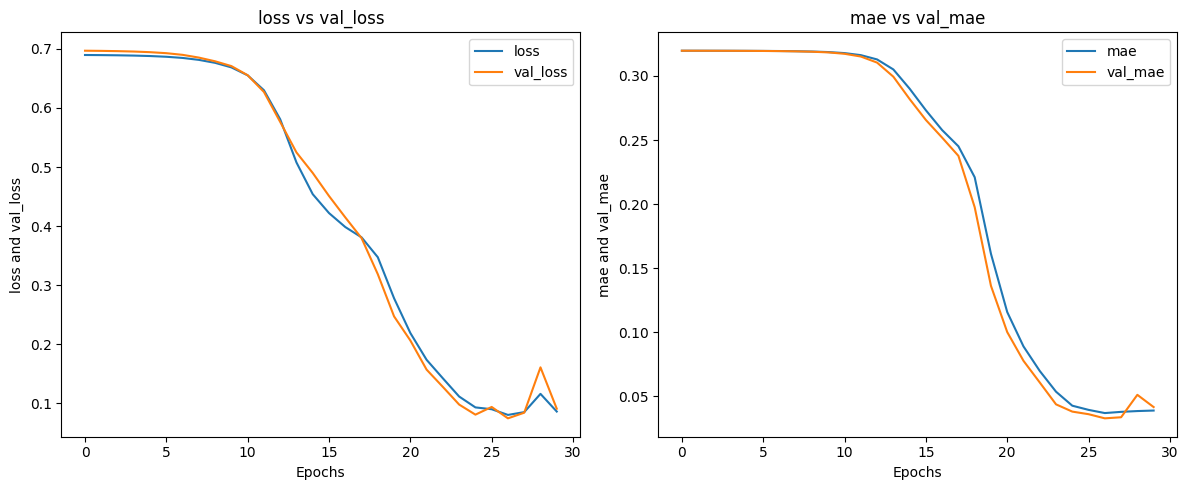

In [26]:
plot(adjust_learning_rate, "loss", "val_loss", "mae", "val_mae" )

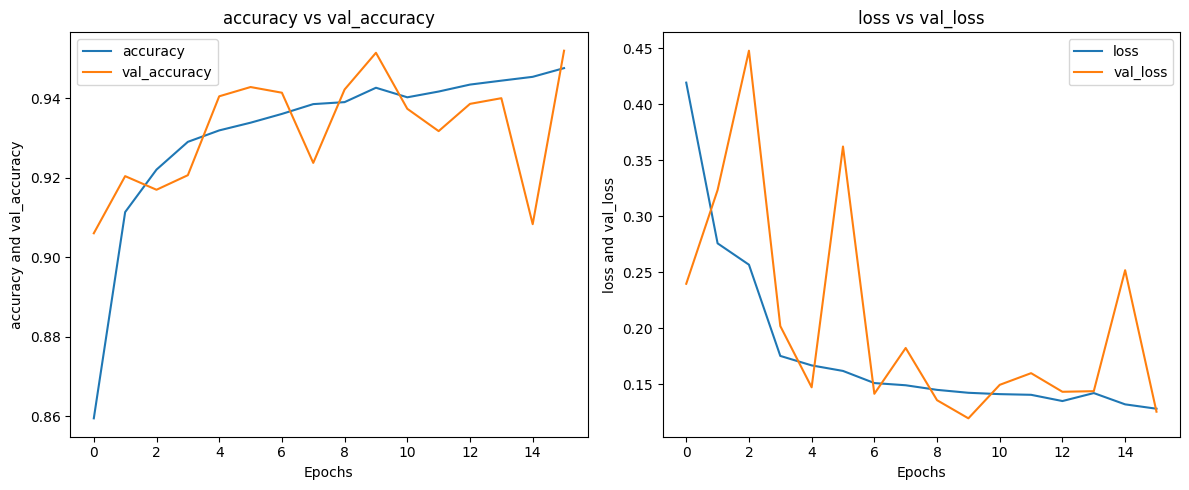

In [27]:
plot(model_train,"accuracy", "val_accuracy","loss","val_loss")

## Predict

In [28]:
# This function doesn't use normalized for the input feature

#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

def output(energi, protein, lemak, karbohidrat, serat, natrium):
    index_to_grade = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
    input_data = np.array([[energi, protein, lemak, karbohidrat, serat, natrium]])
    predict = model.predict(input_data)
    max_index = np.argmax(predict)
    grade = index_to_grade[max_index]
    predict = np.array2string(predict, formatter={'float_kind':'{0:.3f}'.format})
    
    return grade, predict

In [29]:
def real_class(energi, protein, lemak, karbohidrat, serat, natrium):
    negative_score = (
        min(int(energi/ 80), 10) +
        min(int(lemak / 1), 10) +
        min(int(karbohidrat / 4.5), 10) +  
        min(int(natrium / 90), 10)
    )
    positive_score = (
        min(int(serat /0.7), 5) +
        min(int(protein / 1.6), 5) 
    )
    score = negative_score - positive_score
    if score <= -1:
        return "A"
    elif -1 < score <= 2:
        return "B"
    elif 2 < score <= 10:
        return "C"
    elif 10 < score <= 18:
        return "D"
    else:
        return "E"
    

In [30]:
#input
#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
def testing():
    result = []
    
    data_testing = {
        "output 1" : [0.09, 2, 4, 12, 0, 220],
        "output 2" : [554, 8.3, 19.7, 39.5, 4.2, 400],
        "output 3" : [643,4.8,38.6,31.0,0,0],
        "output 4" : [500,5,12.5,0,0,300],
        "output 5" : [550,10,15,0,0,575],
        "output 6" : [533,6,23,26,0,150],
        "output 7" : [555,11,33,22,3.1,222],
        "output 8" : [484,6,8.1,33.4,0,490],
        "output 9" : [600,12,18,28,0,0],
        "output 10" : [527,5,16,55,2.7,69],
        "output 11" : [500,8,8,16,8.3,708],
        "output 12" : [500,9.09,12.5,45,4.54,227],
        "output 13" : [550,20,15,0,0,625],
        "output 14" : [536,11.3,33.6,45.2,0,88],
        "output 15" : [487,7.6,12.8,30.7,5.12,294.8],
        "output 16" : [500,6.25,21.875,31.25,6.25,187.5],
        "output 17" : [492,4.3,10.1,38.4,2.5,534],
        "output 18" : [714.2,0,57.1,0,0,571.4],
        "output 19" : [480,48,10,0,0,770],
        "output 20" : [500,8.3,8.3,33.3,0,208.3],
        "output 21" : [50,10,20,45,5,75],
        "output 22" : [500,0,12.5,5,10,850],
        "output 23" : [333,6.6,5,56.6,0,83.3],
        "output 24" : [500,0,12.5,5,10,450],
        "output 25" : [520,4,14,4,0,300],
        "output 26" : [337,8.5,1.1,22.4,8.6,220],
        "output 27" : [375,54.16,10.41,16.66,4.16,0]
    }
    
    for key, input_values in data_testing.items():
        grade, prediction = output(*input_values)
        real_grade = real_class(*input_values)
        result.append((key, grade, prediction,real_grade))
        
    
    correct_pred = 0
    for item in result:
        if item[1] == item[3]:
            correct_pred += 1
    
    return print(f'Total Correct: {correct_pred} from {len(result)}'), result
    
#output
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

In [31]:
testing()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━

(None,
 [('output 1', 'C', '[[0.000 0.018 0.785 0.160 0.038]]', 'C'),
  ('output 2', 'E', '[[0.000 0.000 0.035 0.307 0.658]]', 'D'),
  ('output 3', 'E', '[[0.000 0.000 0.000 0.015 0.984]]', 'E'),
  ('output 4', 'E', '[[0.000 0.000 0.042 0.470 0.488]]', 'D'),
  ('output 5', 'E', '[[0.000 0.000 0.042 0.473 0.485]]', 'D'),
  ('output 6', 'D', '[[0.000 0.000 0.002 0.730 0.269]]', 'E'),
  ('output 7', 'D', '[[0.000 0.000 0.016 0.911 0.073]]', 'D'),
  ('output 8', 'D', '[[0.000 0.000 0.044 0.485 0.472]]', 'E'),
  ('output 9', 'E', '[[0.000 0.000 0.000 0.393 0.607]]', 'D'),
  ('output 10', 'E', '[[0.000 0.000 0.000 0.007 0.993]]', 'E'),
  ('output 11', 'C', '[[0.000 0.001 0.409 0.407 0.183]]', 'D'),
  ('output 12', 'E', '[[0.000 0.000 0.039 0.416 0.545]]', 'D'),
  ('output 13', 'D', '[[0.000 0.000 0.075 0.519 0.406]]', 'D'),
  ('output 14', 'E', '[[0.000 0.000 0.001 0.235 0.764]]', 'E'),
  ('output 15', 'E', '[[0.000 0.000 0.042 0.463 0.495]]', 'D'),
  ('output 16', 'D', '[[0.000 0.000 0.010 

## Save the model

In [32]:
model.save("app/model/nutrigrade_model.h5")

## Testing Model Saved

In [33]:
model = load_model('app/model/nutrigrade_model.h5', compile=False)

In [34]:
# This function uses normalized for the input feature

#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

def output(energi, protein, lemak, karbohidrat, serat, natrium):
    index_to_grade = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
    input_data = np.array([[energi, protein, lemak, karbohidrat, serat, natrium]])
    input_data_normalized = normalizer(input_data)
    predict = model.predict(input_data_normalized)
    max_index = np.argmax(predict)
    grade = index_to_grade[max_index]
    predict = np.array2string(predict, formatter={'float_kind':'{0:.3f}'.format})
    
    return grade, predict

In [35]:
testing()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━

(None,
 [('output 1', 'C', '[[0.000 0.018 0.785 0.160 0.038]]', 'C'),
  ('output 2', 'E', '[[0.000 0.000 0.035 0.307 0.658]]', 'D'),
  ('output 3', 'E', '[[0.000 0.000 0.000 0.015 0.984]]', 'E'),
  ('output 4', 'E', '[[0.000 0.000 0.042 0.470 0.488]]', 'D'),
  ('output 5', 'E', '[[0.000 0.000 0.042 0.473 0.485]]', 'D'),
  ('output 6', 'D', '[[0.000 0.000 0.002 0.730 0.269]]', 'E'),
  ('output 7', 'D', '[[0.000 0.000 0.016 0.911 0.073]]', 'D'),
  ('output 8', 'D', '[[0.000 0.000 0.044 0.485 0.472]]', 'E'),
  ('output 9', 'E', '[[0.000 0.000 0.000 0.393 0.607]]', 'D'),
  ('output 10', 'E', '[[0.000 0.000 0.000 0.007 0.993]]', 'E'),
  ('output 11', 'C', '[[0.000 0.001 0.409 0.407 0.183]]', 'D'),
  ('output 12', 'E', '[[0.000 0.000 0.039 0.416 0.545]]', 'D'),
  ('output 13', 'D', '[[0.000 0.000 0.075 0.519 0.406]]', 'D'),
  ('output 14', 'E', '[[0.000 0.000 0.001 0.235 0.764]]', 'E'),
  ('output 15', 'E', '[[0.000 0.000 0.042 0.463 0.495]]', 'D'),
  ('output 16', 'D', '[[0.000 0.000 0.010 